### Laboratorium 6 - część badawcza

W pakiecie OpenCV wszystkie zadania związane z detekcją i opisem punktów kluczowych realizowane są przez zestaw specjalnych klas, dla których bazową jest `cv::Feature2D`. Jedną z wielu pochodnych tej klasy jest interesująca nas na zajęciach `cv::SIFT`, z której dokumentacją należy się zapoznać.  
Najważniejsze, co trzeba wiedzieć:

1. do konstrukcji obiektu SIFT służy metoda [`cv2.SIFT_create`](https://docs.opencv.org/4.x/d7/d60/classcv_1_1SIFT.html#ad337517bfdc068ae0ba0924ff1661131) - to do niej przekazujemy parametry detektora (w dokumentacji występuje jako `cv::SIFT::create`);
2. obsługujemy detektor przez interfejs `cv::Feature2D`, konkretnie metody [`detect`](https://docs.opencv.org/4.x/d0/d13/classcv_1_1Feature2D.html#aa4e9a7082ec61ebc108806704fbd7887) do detekcji punktów kluczowych oraz [`compute`](https://docs.opencv.org/4.x/d0/d13/classcv_1_1Feature2D.html#ab3cce8d56f4fc5e1d530b5931e1e8dc0) do obliczania ich deskryptorów (opcjonalnie `detectAndCompute`).

Schemat użycia:

```python
sift_instance = cv2.SIFT_create()
# 'image' powinno być obrazem jednokanałowym (jeśli nie, zostanie zastosowane cvtColor z flagą COLOR_BGR2GRAY)
keypoints = sift_instance.detect(image)
keypoints, descriptors = sift_instance.compute(image, keypoints)
```

`keypoints` jest listą obiektów specjalnego typu `cv2.KeyPoint`, która **jest modyfikowana** przez `SIFT::compute`!  
`descriptors` jest natomiast macierzą float32 o wymiarach NxK, gdzie N jest liczbą punktów kluczowych, a K jest liczbą obliczonych cech.

Warto również zapoznać się z funkcją [`cv2.drawKeypoints`](https://docs.opencv.org/4.x/d4/d5d/group__features2d__draw.html#ga5d2bafe8c1c45289bc3403a40fb88920) w kontekście prezentacji wyników. Zwróć uwagę na flagi sterujące rysowaniem - szczególnie użyteczna jest `cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS`.


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#### Zadanie 1

Przetestuj wpływ podstawowych parametrów detektora SIFT (`contrastThreshold` i `edgeThreshold`) na uzyskiwane punkty kluczowe (liczność, lokalizacja, rozmiar), korzystając z obrazów `cells` i `lena`. Pamiętaj że ich działanie jest odwrotne (tzn. jeden odsiewa cechy "mniejsze niż", a drugi "większe niż").


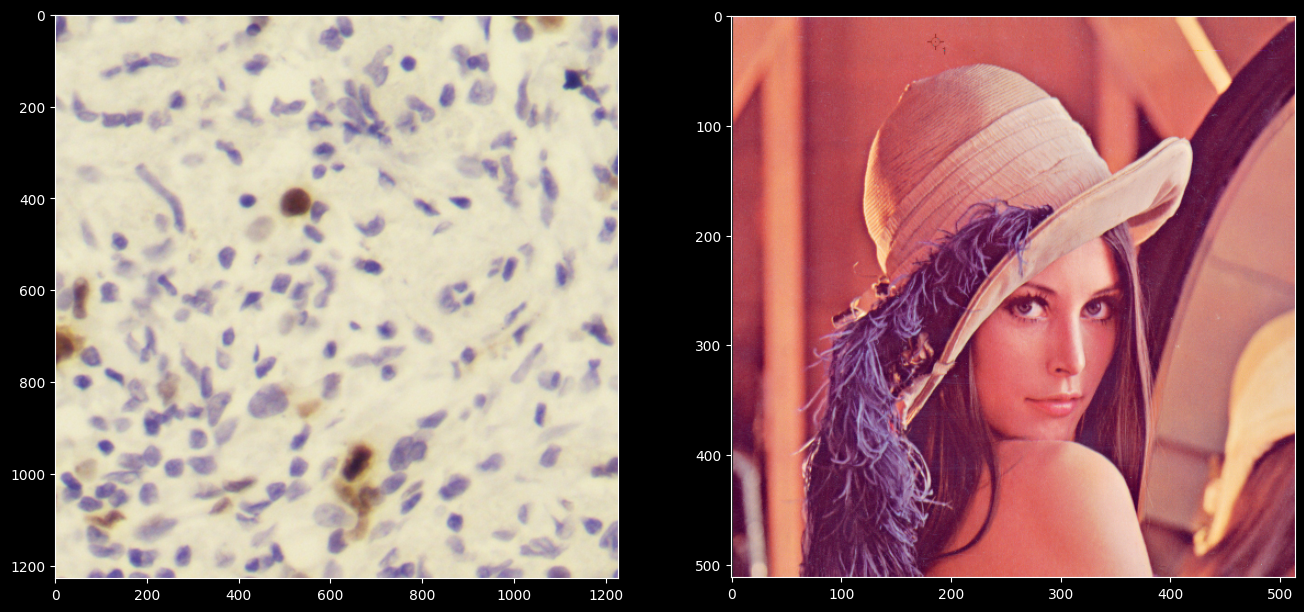

In [2]:
cells = cv2.imread('dane6/p1_0308_7.jpg')
lena = cv2.imread('dane6/Lena.jpg')
f, (a1, a2) = plt.subplots(1, 2, figsize=(16, 10))
a1.imshow(cells[..., ::-1]);
a2.imshow(lena[..., ::-1]);

#### Zadanie 2

Detektor SIFT jest w teorii niezmienniczy względem translacji, rotacji czy zmiany skali. Przetestuj te własności w praktyce, sprawdzając stabilność punktów wykrywanych na obróconej i przeskalowanej wersji obrazów `cells` i `lena`. Dokonaj oceny wizualnie, sprawdzając zachowanie detektora dla kilku wybranych rotacji i skal (**nie** grid search).

_Co świadczy o stabilności i niezmienniczości detektora?_


In [3]:
def rotate(image, angle, scale=1.0):
    center = (image.shape[0] // 2, image.shape[1] // 2)
    rmat = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(image, rmat, (image.shape[0], image.shape[1]), flags=cv2.INTER_CUBIC)

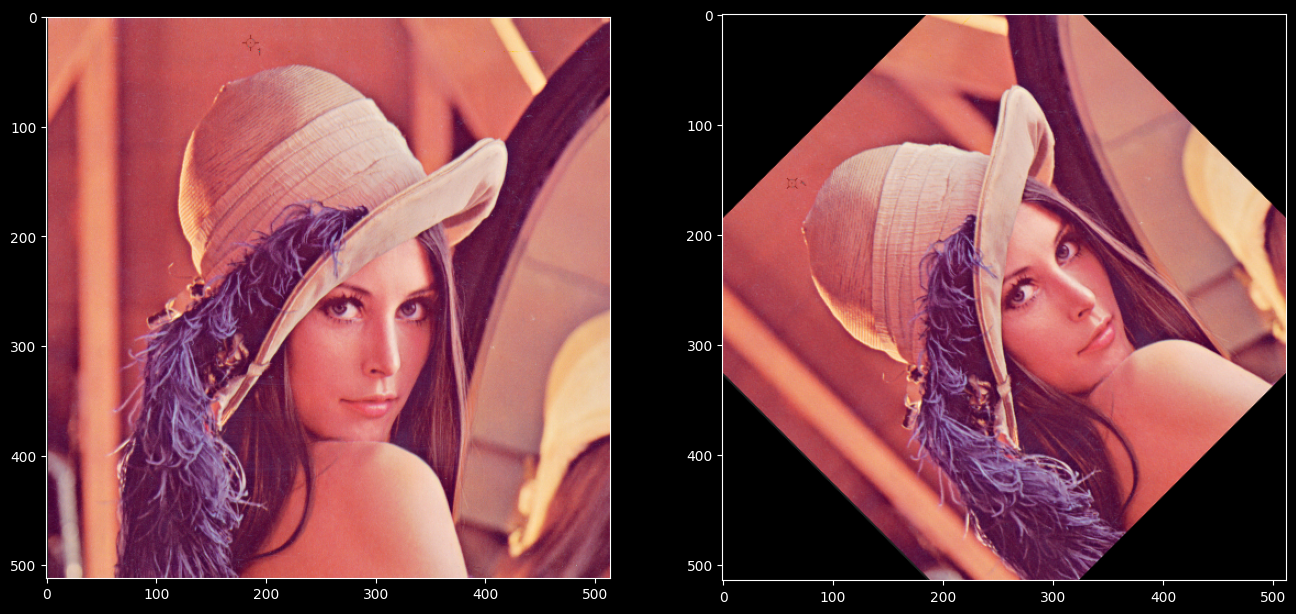

In [4]:
# przykład dla Leny, pamiętaj o cells!
lena_rot = rotate(lena, 45.0, scale=0.9)
f, (a1, a2) = plt.subplots(1, 2, figsize=(16, 10))
a1.imshow(lena[..., ::-1]);
a2.imshow(lena_rot[..., ::-1]);

#### Zadanie 3

Dane są obrazy `coke` i `table`. Wykorzystaj metodologię parowania punktów kluczowych do znalezienia wystąpienia puszki z Colą na stole. To zadanie jest podzielone na dwie części - czytaj dalej.


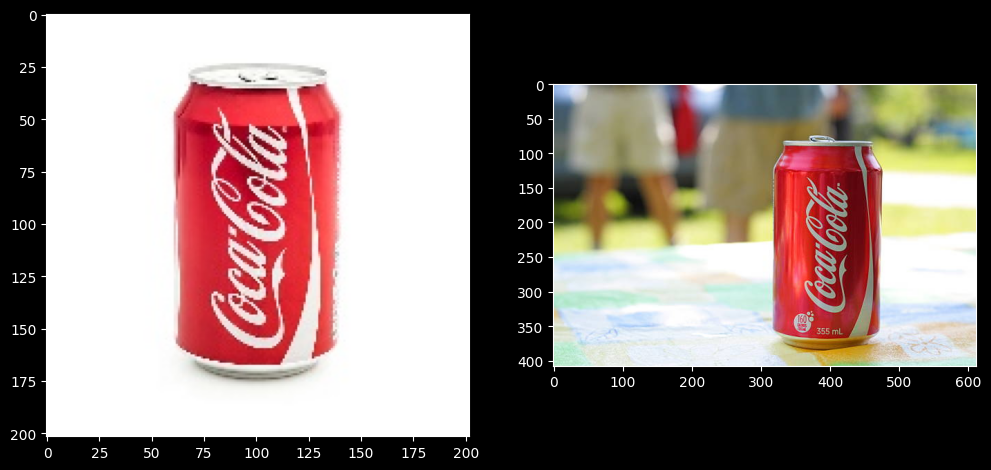

In [5]:
coke = cv2.imread('dane6/coke.jpg')
table = cv2.imread('dane6/coke-table.jpg')
f, (a1, a2) = plt.subplots(1, 2, figsize=(12,12))
a1.imshow(coke[..., ::-1]);
a2.imshow(table[..., ::-1]);

##### Zadanie 3a

Wykonaj detekcję punktów kluczowych i ich parowanie z użyciem dowolnego matchera. Wykonaj filtrację znalezionych par po dystansie - co obserwujesz, zmieniając próg?


##### Zadanie 3b

Znajdź transformację geometryczną dla par dopasowanych punktów, tak aby przekształcić `coke` (_train_) do geometrii `table` (_query_). Zademonstruj poprawność, zestawiając obok siebie przekształconą wersję `coke` oraz oryginalny `table`, bądź nanosząc jedno na drugie. Zidentyfikuj punkty, które znaleziona transformacja przekształca "dobrze", tzn. ich współrzędne po przekształceniu leżą w pobliżu odpowiadających im punktów z drugiego obrazu; nanieś je na obraz.

_Jak na wyniki wpływa wykrycie większej lub mniejszej liczby punktów kluczowych na etapie SIFT? W jakim stopniu filtracja poprawia rezultaty? Jak działa i jaką rolę w procesie parowania odgrywa RANSAC?_
